# Life Expectancy Regression

## Objective

* To know the relations of `Life Expectancy` in all countries and find the variables that affect it the most.

## Library

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DataFrame

In [9]:
# Read the data

df = pd.read_csv('Country_HELP.csv', on_bad_lines='skip')
df

,Country,Child mortality,Export,Health Cost,Import,Income Per Capita,Inflation,Life Expectancy,Fertility Rate,GDP Per Capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
158,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
159,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
160,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
161,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
# Review the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            163 non-null    object 
 1   Child mortality    163 non-null    float64
 2   Export             163 non-null    float64
 3   Health Cost        163 non-null    float64
 4   Import             163 non-null    float64
 5   Income Per Capita  163 non-null    int64  
 6   Inflation          163 non-null    float64
 7   Life Expectancy    163 non-null    float64
 8   Fertility Rate     163 non-null    float64
 9   GDP Per Capita     163 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.9+ KB


*   There are 10 columns and 167 rows of data.
*   There are 167 non-null values from each rows.
*   There is 1 object column, 7 float columns, and 2 integer columns, which means most of the data presented in number.


In [11]:
# Check null values in the dataframe

df.isnull().sum()

Country              0
Child mortality      0
Export               0
Health Cost          0
Import               0
Income Per Capita    0
Inflation            0
Life Expectancy      0
Fertility Rate       0
GDP Per Capita       0
dtype: int64

There is no null values.

Categorize columns to the specific criteria:
* health: Health cost, child mortality, fertility rate, and life expectancy.
* socioeconomic: GDP per capita, income per capita, import, export, and inflation.

## EDA

### Distribution of Life Expectancy

<Axes: xlabel='Life Expectancy', ylabel='Count'>

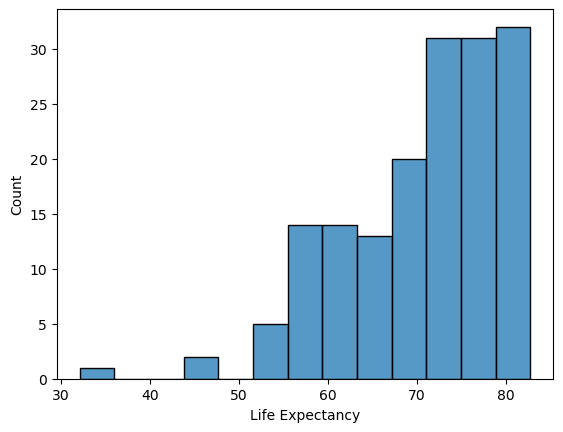

In [17]:
sns.histplot(data=df['Life Expectancy'])

Most of `Life Expectancy` in the world is more than 70 years.

### Correlation

C:\Users\Milka\AppData\Local\Temp\ipykernel_12208\3562956007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')


<Axes: >

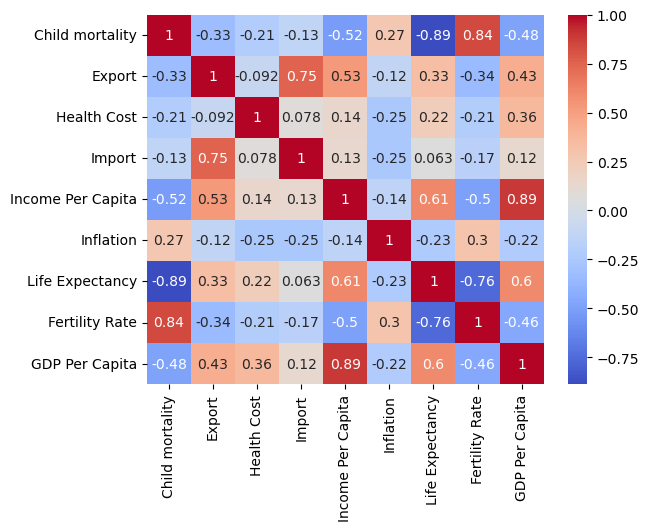

In [22]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

From the heatmap there is a high correlation between `Life Expectancy` with `Fertility rate` and `Child Mortality`. <br>
It has low to zero correlation with `Import` and `Inflation`. <br>
Another thing to take note that `Life Expectancy` has low correlation with `Health Cost`.

### Life Expectancy - Fertility Rate

How does `Life Expectancy` relate to other health parameter? (Especially, those with high correlation).

<Axes: xlabel='Life Expectancy', ylabel='Fertility Rate'>

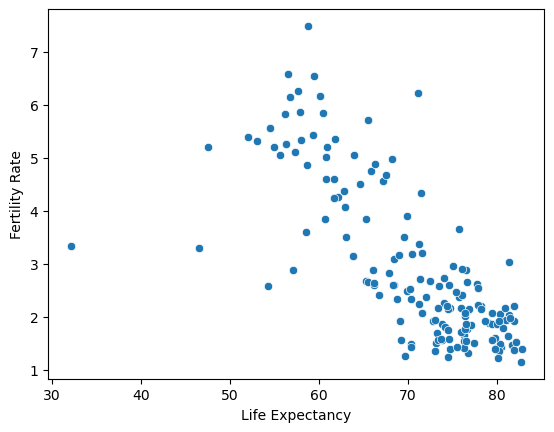

In [14]:
sns.scatterplot(x="Life Expectancy", y="Fertility Rate", data=df)

It is **negatively correlated**. Because `Life Expectancy` is higher when the `Fertility Rate` is smaller.

### Life Expectancy - GDP Per Capita

How does `Life Expectancy` relate to other economic parameter? (Especially, those with high correlation).

<Axes: xlabel='Life Expectancy', ylabel='Income Per Capita'>

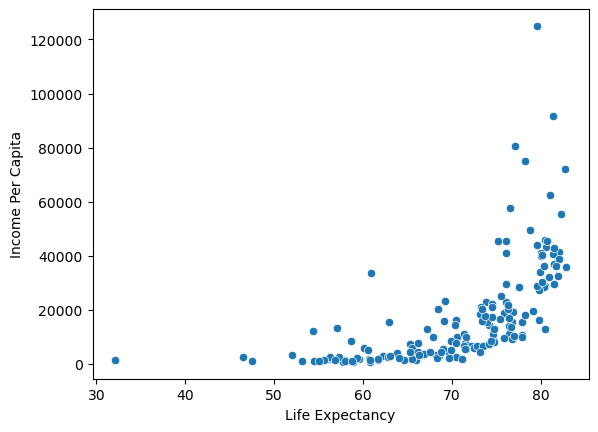

In [23]:
sns.scatterplot(x="Life Expectancy", y="Income Per Capita", data=df)

The countries with `Income Per Capita` < 20000 have more variation of `Life Expectancy`, while those with higher `Income Per Capita` have `Life Expectancy` around 80 years.

### Life Expectancy - Health Cost

Let's see how the `Life Expectancy` relates to `Health Cost`. Does having a higher `Life Expectancy` mean a higher `Health Cost`?

<Axes: xlabel='Life Expectancy', ylabel='Health Cost'>

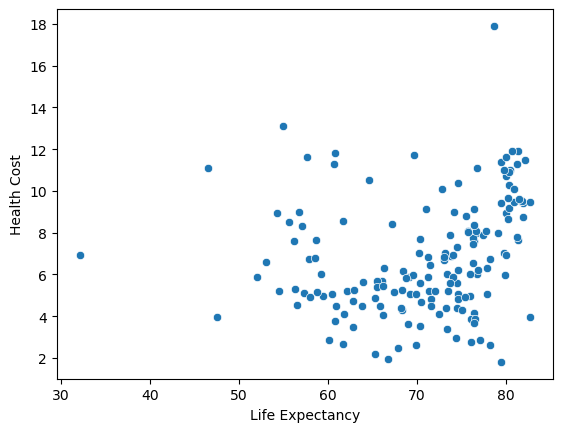

In [16]:
sns.scatterplot(x="Life Expectancy", y="Health Cost", data=df)

`Life Expectancy` is more variative in relations with `Health Cost`. While some countries have a high `Health Cost` but also a high `Life Expectancy`, there are some on the other sides.

### Outliers

The outliers are kept as it is in the dataset, so we know the real relations.

## Hypothesis Testing

In [40]:
import scipy.stats as st
import statsmodels.formula.api as smf

### 1. Does High Fertility Rate Means Higher Life Expectancy?

In [25]:
#T-Test

s_mean = df['Life Expectancy'].mean()
nons_mean = df['Fertility Rate'].mean()
print(f'The difference of values: {nons_mean - s_mean}')

The difference of values: -67.78901840490798


In [26]:
ttest0 = st.ttest_ind(a = df['Life Expectancy'], b = df['Fertility Rate'])
ttest0.pvalue

5.146626444374683e-240

In [34]:
p_value0 = ttest0.pvalue
print('P-Value :',p_value0)

if p_value0 >= 0.05:
    print('Countries with high fertility rate have higher life expectancy.')
else:
    print('The fertility rate of a country does not affect its life expectancy.')

P-Value : 5.633547960569634e-228
The fertility rate of a country does not affect its life expectancy.


### 2. Does High Income Per Capita Means Higher Life Expectancy?

In [28]:
#T-Test

s_mean = df['Life Expectancy'].mean()
nons_mean = df['Income Per Capita'].mean()
print(f'The difference of values: {nons_mean - s_mean}')

The difference of values: 17368.70245398773


In [29]:
ttest0 = st.ttest_ind(a = df['Life Expectancy'], b = df['Income Per Capita'])
ttest0.pvalue

1.2614774950154626e-25

In [35]:
p_value0 = ttest0.pvalue
print('P-Value :',p_value0)

if p_value0 >= 0.05:
    print('Countries with high income per capita have higher life expectancy.')
else:
    print('The income per capita of a country does not affect its life expectancy.')

P-Value : 5.633547960569634e-228
The income per capita of a country does not affect its life expectancy.


### 3. Does High Health Cost Means Higher Life Expectancy?

In [31]:
#T-Test

s_mean = df['Life Expectancy'].mean()
nons_mean = df['Health Cost'].mean()
print(f'The difference of values: {nons_mean - s_mean}')

The difference of values: -63.91987730061349


In [32]:
ttest0 = st.ttest_ind(a = df['Life Expectancy'], b = df['Health Cost'])
ttest0.pvalue

5.633547960569634e-228

In [36]:
p_value0 = ttest0.pvalue
print('P-Value :',p_value0)

if p_value0 >= 0.05:
    print('Countries with high health cost have higher life expectancy.')
else:
    print('The health cost of a country does not affect its life expectancy.')

P-Value : 5.633547960569634e-228
The health cost of a country does not affect its life expectancy.


## Modelling with Regression

As the relation between `Life Expectancy` and `Health Cost` is more variative and there is no specific pattern, it is better to see deeper about their relations

In [37]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [48]:
df.rename(columns = {'Health Cost':'Health_cost'}, inplace = True)

In [49]:
df.rename(columns = {'Life Expectancy':'Life_expectancy'}, inplace = True)

### Fit Linear Regression

In [73]:
# Create OLS model object
model = smf.ols("Life_expectancy ~ Health_cost", df)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_life_cost = print_coef_std_err(results)

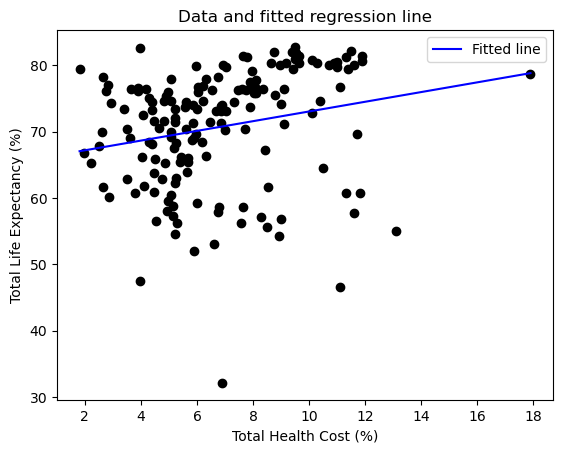

In [60]:
predictor = "Health_cost"
outcome = "Life_expectancy"
data = df.copy()
results_ = results_life_cost.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("Total Life Expectancy (%)")
plt.xlabel("Total Health Cost (%)")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

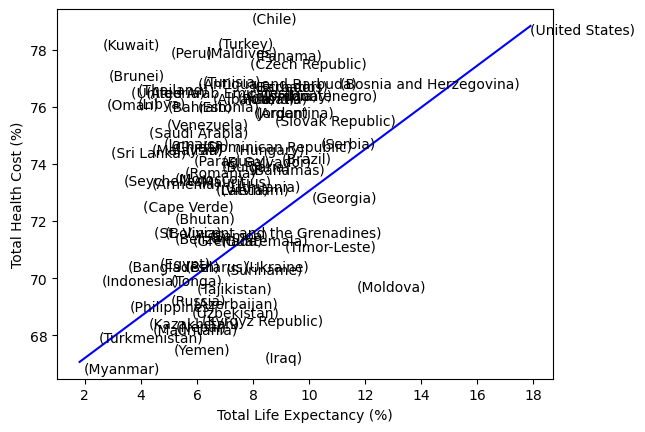

In [62]:
x_coords = df["Health_cost"]
y_coords = df["Life_expectancy"]
xy_name = df["Country"]

for x, y, z in zip(x_coords, y_coords, xy_name):
    plt.annotate(
        '(%s)' % (z), 
        xy=(x, y), 
        xytext=(0, 0),
        textcoords='offset points', 
        va='center')

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

plt.ylabel("Total Health Cost (%)")
plt.xlabel("Total Life Expectancy (%)")

# Show the plot
plt.show()

### Coefficient Interpretation

In [76]:
results_life_cost

,coef,std err
Intercept,65.737988,1.850754
Health_cost,0.732186,0.253478


The difference of 1 point from `Health Cost` will affect the `Life Expectancy` 0.73 point positively (increase `Life Expectancy` by 0.73 point).

In [77]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     8.344
Date:                Sun, 03 Sep 2023   Prob (F-statistic):            0.00440
Time:                        17:40:41   Log-Likelihood:                -582.87
No. Observations:                 163   AIC:                             1170.
Df Residuals:                     161   BIC:                             1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      65.7380      1.851     35.520      0.000      62.083      69.393
Health_cost     0.7322      0.253      2.889      0.004       0.232       1.233
==============================================================================
Omnibus:                       40.552   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.838
Skew:                          -1.258   Prob(JB):                     3.06e-15
Kurtosis:                       4.873   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The correlation between these 2 paramaters can be considered medium-low, as the R-squared almost lower than 0.5.

### Model After Handling Outliers

In [79]:
# Look for outliers from the latest dataset

Q1 = df['Health_cost'].quantile(0.25)
Q3 = df['Health_cost'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3.6800000000000015


In [80]:
# Replace outliers to Q1 & Q3

df.loc[df['Health_cost'] < (Q1-IQR*1.5), 'Health_cost'] = Q1
df.loc[df['Health_cost'] > (Q3+IQR*1.5), 'Health_cost'] = Q3

In [90]:
# Look for outliers from the latest dataset

Q1 = df['Life_expectancy'].quantile(0.25)
Q3 = df['Life_expectancy'].quantile(0.75)
IQR1 = Q3 - Q1
print(IQR1)

11.449999999999989


In [91]:
# Replace outliers to Q1 & Q3

df.loc[df['Life_expectancy'] < (Q1-IQR1*1.5), 'Life_expectancy'] = Q1
df.loc[df['Life_expectancy'] > (Q3+IQR1*1.5), 'Life_expectancy'] = Q3

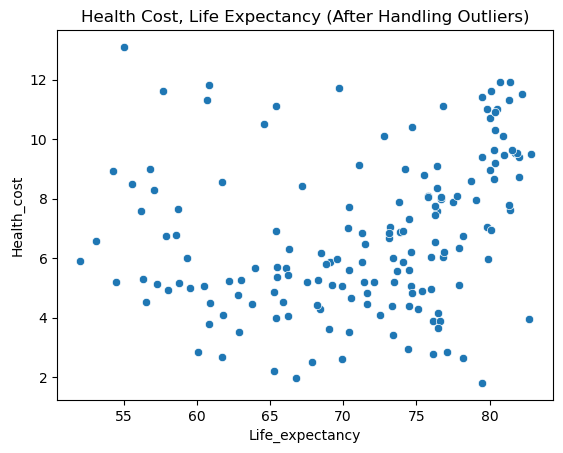

In [92]:
# Visualize scatterplot without outliers

sns.scatterplot(x="Life_expectancy", y="Health_cost", data=df)
plt.title('Health Cost, Life Expectancy (After Handling Outliers)')
plt.show()

In [93]:
# Create OLS model object
model1 = smf.ols("Life_expectancy ~ Health_cost", df)

# Fit the model
results1 = model1.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_life_cost1 = print_coef_std_err(results1)

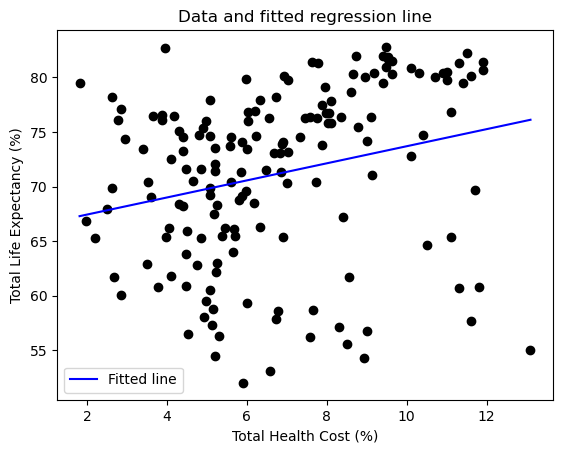

In [94]:
predictor = "Health_cost"
outcome = "Life_expectancy"
data = df.copy()
results_ = results_life_cost1.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("Total Life Expectancy (%)")
plt.xlabel("Total Health Cost (%)")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [95]:
results_life_cost1

,coef,std err
Intercept,65.870287,1.709910
Health_cost,0.782625,0.237581


The difference of 1 point from `Health Cost` will affect the `Life Expectancy` 0.78 point positively (increase `Life Expectancy` by 0.78 point).

In [96]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     10.85
Date:                Sun, 03 Sep 2023   Prob (F-statistic):            0.00121
Time:                        17:58:25   Log-Likelihood:                -563.50
No. Observations:                 163   AIC:                             1131.
Df Residuals:                     161   BIC:                             1137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      65.8703      1.710     38.523      0.000      62.494      69.247
Health_cost     0.7826      0.238      3.294      0.001       0.313       1.252
==============================================================================
Omnibus:                       15.669   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.208
Skew:                          -0.810   Prob(JB):                     0.000111
Kurtosis:                       2.761   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model after handling outliers perform better with the `R-squared` is more than 0.5 (0.63).